# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Alireza Maleki
2.   Student Number: 401210956


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./data/data01.csv")

dataset = dataset[["X", "Y"]]

print(dataset)
# implement the split part
# name them: x_train, x_test, y_train, y_test

numSamples = dataset.shape[0]
numTrain = int(numSamples*0.7)
x_train = dataset["X"][:numTrain]
y_train = dataset["Y"][:numTrain]

x_test = dataset["X"][numTrain:]
y_test = dataset["Y"][numTrain:]

            X         Y
0    1.867470 -1.210867
1    1.168675 -0.011459
2    0.795181 -0.882124
3    1.477912  0.006529
4    1.646586 -0.602546
..        ...       ...
495  1.907631 -1.596070
496  1.706827 -0.847200
497  0.092369  0.439343
498  1.084337 -0.431515
499  0.493976  0.427420

[500 rows x 2 columns]


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

xc = x_train - x_train.mean()
yc = y_train - y_train.mean()

m0 = np.dot(xc.T, yc) / np.dot(xc.T, xc)

m1 = y_train.mean() - m0 * x_train.mean()

m = [m0,m1]


print("slope: ", m0)
print("intercept: ", m1)


slope:  -1.009754353923338
intercept:  0.7972153699789037


In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.sqrt(np.square(predicted_train_y-y_train).mean())
test_error = np.sqrt(np.square(predicted_test_y-y_test).mean())

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.567263866134983
MSE test error: 0.5928829815274865


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

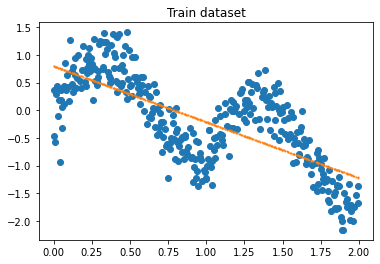

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

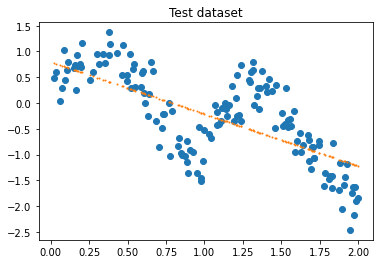

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?
* No, the train error is near to test error.

What about the line you drew in the last part?

* No, because the model is not linear and we can improve it by changing our regrassion model.


Was it appropriate for the dataset?
<br>No<br/>
Explain what are the main problems here.

* The data model is not linear.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

In Least Square we try to minimize the MSE for the linear function. But when we use weight function, we might get out of linearity and it acts like a kernel.
By using gaussian kernel we make the line a smooth shape. so for this case, we decrease the train and test error. (depends on the σ)

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.linalg.norm(the_query_point-xi)**2 / 2 / hyperparameter**2)
        
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.vstack((train_X, np.ones(l))).T
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    
    XTW = np.dot(X.T, W)
    theta = np.dot(np.linalg.inv(np.dot(XTW, X)), np.dot(XTW, train_Y).T)
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
predicted_test = [predict(x_train, y_train.to_numpy(), query, .1) for query in x_test]
predicted_test = np.array(predicted_test)
error = np.sqrt(np.square(predicted_test[:,0,0]-y_test.to_numpy()).mean())
print(f"MSE test error: {error}")

MSE test error: 0.3322598504027027


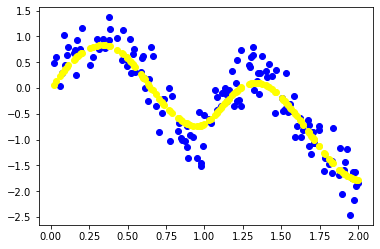

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes. when we use a small σ, we make the line, a smooth curve, that can adapt its self to data. However, for big σs the performance might not change or decrease.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Again we are using a method like local weighting. if we use a small K (like a small σ) we might face with a noisy regression and the performance get worse. But for a decent K we can get a smoot curve. However, it is not as smooth as gaussian kernel.

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1-x2)
        return distance

    def return_nn_ids(self, x):

        dists = np.zeros(len(self.X))
        for i, xi in enumerate(self.X):
          dists[i] = self.distance(x, xi)

        indices = np.argsort(dists)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.sqrt(np.square(predicted_y - y_test).mean())
    return error, predicted_y

In [ ]:
k = 10
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.31290852045439915


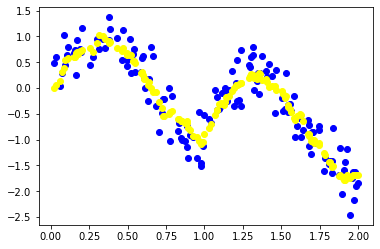

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

As it seems, KNN result is near the gaussian weighting result, but KNN method is not smooth and contains the data noise. KNN method also needs more computation in comparison to the gaussian method.